In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import plotly.express as px

In [8]:
df = pd.read_csv('data_raw.csv')

In [9]:
df.head()

,status,private pool,propertyType,street,baths,fireplace,city,sqft,zipcode,beds,...,remodeled_year,heating,cooling,parking,lotsize,price_sqft,schools_names,schools_grades,schools_distances,schools_ratings
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,Gas Logs,Southern Pines,2900,28387,4,...,NaN,"Central A/C, Heat Pump",NaN,NaN,None,$144,"Southern Pines Elementary School, Southern Mid...","3–5, 6–8, 9–12, PK–2, 6–8, 9–12, PK–5, K–12","2.7 mi, 3.6 mi, 5.1 mi, 4.0 mi, 10.5 mi, 12.6 ...","4, 4, 7, NR, 4, 7, NR, NR"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,NaN,Spokane Valley,"1,947 sqft",99216,3 Beds,...,NaN,NaN,NaN,NaN,5828 sqft,$159/sqft,"East Valley High School&Extension, Eastvalley ...","9-12, 3-8, PK-8","1.65mi, 1.32mi, 1.01mi","4/10, None/10, 4/10"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,yes,Los Angeles,"3,000 sqft",90049,3 Beds,...,1967.0,Forced Air,Central,Attached Garage,"8,626 sqft",$965/sqft,"Paul Revere Middle School, Brentwood Science S...","6-8, K-5, 9-12","1.19mi, 2.06mi, 2.63mi","8/10, 4/10, 8/10"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,yes,Dallas,"6,457 sqft",75205,5 Beds,...,2006.0,Forced Air,Central,Detached Garage,"8,220 sqft",$371/sqft,"Mcculloch Intermediate School, Bradfield Eleme...","5-6, PK-4, 7-8, 9-12","1.05mi, 0.1mi, 1.05mi, 0.81mi","9/10, 9/10, 10/10, 9/10"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,NaN,Palm Bay,NaN,32908,NaN,...,NaN,NaN,NaN,NaN,"10,019 sqft",None,"Southwest Middle School, Bayside High School, ...","7-8, 9-12, PK-6","5.96mi, 3.25mi, 3.03mi","4/10, 5/10, 5/10"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   status             337267 non-null  object 
 1   private pool       4181 non-null    object 
 2   propertyType       342452 non-null  object 
 3   street             377183 non-null  object 
 4   baths              270847 non-null  object 
 5   fireplace          103115 non-null  object 
 6   city               377151 non-null  object 
 7   sqft               336608 non-null  object 
 8   zipcode            377185 non-null  object 
 9   beds               285903 non-null  object 
 10  state              377185 non-null  object 
 11  stories            226470 non-null  object 
 12  mls-id             24942 non-null   object 
 13  PrivatePool        40311 non-null   object 
 14  MlsId              310305 non-null  object 
 15  target             374704 non-null  object 
 16  ye

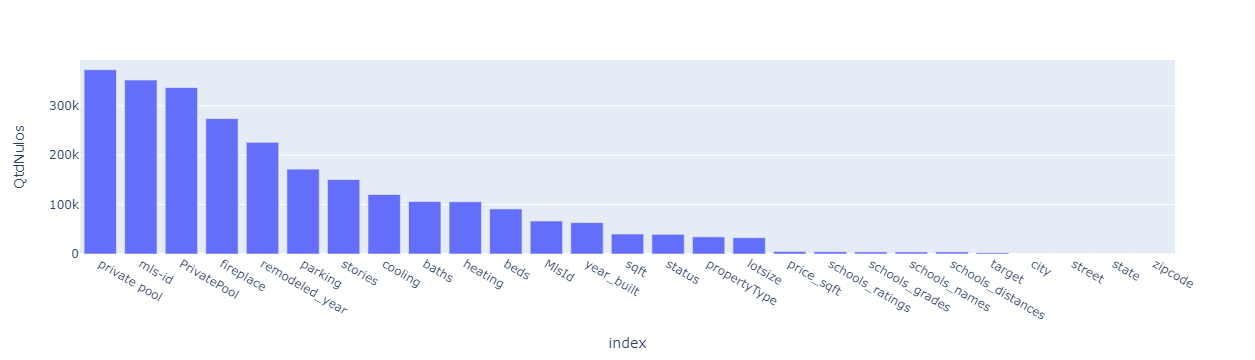

In [12]:
nulos = df.isnull().sum().to_frame()
nulos.columns = ['QtdNulos']
nulos = nulos.sort_values(by=['QtdNulos'], ascending = False)
fig = px.bar(nulos, x=nulos.index , y='QtdNulos')
fig.show()

In [23]:
df.status.value_counts()

for sale                                  156104
Active                                    105207
For sale                                   43465
foreclosure                                 6426
New construction                            5475
Pending                                     4702
Pre-foreclosure                             2119
Pre-foreclosure / auction                   1560
P                                           1488
Under Contract Show                         1183
 / auction                                   936
Under Contract   Showing                     793
Active Under Contract                        718
New                                          690
Under Contract                               690
Contingent                                   581
Price Change                                 563
Auction                                      536
Foreclosed                                   459
A Active                                     443
for rent            

In [24]:
df['private pool'].value_counts()

Yes    4181
Name: private pool, dtype: int64

In [25]:
df.propertyType.value_counts()

single-family home                                                                                                                   92206
Single Family                                                                                                                        62869
Single Family Home                                                                                                                   31728
condo                                                                                                                                25968
lot/land                                                                                                                             20552
Condo                                                                                                                                16561
townhouse                                                                                                                            11464
Land                       

In [27]:
df.baths.value_counts()

2 Baths                  52466
3 Baths                  35506
2                        20452
2.0                      16576
4 Baths                  14764
3.0                      10869
3                        10113
Bathrooms: 2              9538
2.5                       8113
Bathrooms: 3              6613
1                         6583
1.0                       5930
5 Baths                   5370
4.0                       4593
2.5 Baths                 4486
0                         3811
4                         3567
3.5                       3455
Bathrooms: 1              3234
2 ba                      2686
6 Baths                   2604
Bathrooms: 4              2384
1,500                     2209
3 ba                      1893
1.5                       1857
3.5 Baths                 1821
2,000                     1795
1,750                     1723
3,000                     1686
5.0                       1557
2,250                     1442
1,000                     1280
5       

In [28]:
df.sqft.value_counts()

0                                            11854
1,200 sqft                                     839
1,000 sqft                                     654
1,100 sqft                                     573
1,800 sqft                                     563
1,500 sqft                                     547
--                                             535
2,000 sqft                                     523
1,400 sqft                                     517
1,600 sqft                                     455
800 sqft                                       454
1,300 sqft                                     410
900 sqft                                       409
1,440 sqft                                     378
2,400 sqft                                     375
960 sqft                                       362
2,200 sqft                                     359
1,200                                          357
3,000 sqft                                     343
2,100 sqft                     

In [29]:
df.fireplace.value_counts()

yes                                                                                                                                                                                                                                        50356
Yes                                                                                                                                                                                                                                        20856
1                                                                                                                                                                                                                                          14544
2                                                                                                                                                                                                                                           2432
Not Applicable                      

In [30]:
df.parking.value_counts()

Attached Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       70752
2 spaces                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [14]:
df.duplicated().sum()

50